In [2]:
pip install trl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.5/465.5 kB 14.6 MB/s eta 0:00:00


In [3]:
from trl import SFTTrainer
from datasets import load_dataset

dataset = load_dataset("trl-lib/Capybara", split="train")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/520 [00:00<?, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/37.2M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/482k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/15806 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/200 [00:00<?, ? examples/s]

In [4]:
dataset

Dataset({
    features: ['source', 'messages', 'num_turns'],
    num_rows: 15806
})

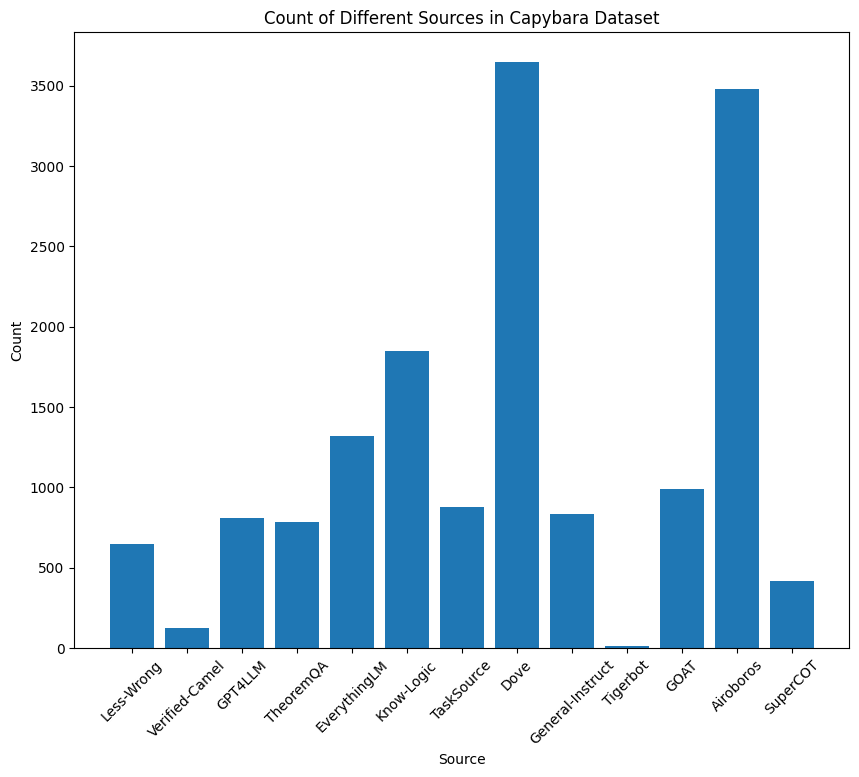

In [5]:
# Plot the count of different sources in the dataset
import matplotlib.pyplot as plt
sources = set(dataset['source'])
source_counts = {source: dataset['source'].count(source) for source in sources}
plt.figure(figsize = (10,8))
plt.bar(source_counts.keys(), source_counts.values())
plt.xlabel('Source')
plt.ylabel('Count')
plt.title('Count of Different Sources in Capybara Dataset')
plt.xticks(rotation = 45)
plt.show()
# dataset['source']

In [ ]:
trainer = SFTTrainer(
    model='Qwen/Qwen2.5-0.5B',
    train_dataset=dataset,
)
trainer.train()

config.json:   0%|          | 0.00/681 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/988M [00:00<?, ?B/s]

In [ ]:
import torch
torch.__version__

'2.9.1'